In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Chicago_Crimes_2001_to_2004.csv',engine='python',error_bad_lines=False)

C:\Users\Taimoor\AppData\Local\Temp\ipykernel_14872\4198593904.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('Chicago_Crimes_2001_to_2004.csv',engine='python',error_bad_lines=False)
Skipping line 1513591: Expected 23 fields in line 1513591, saw 24


In [4]:
data.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229156,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691784636,-87.635116,"(41.691784636, -87.635115968)"


In [5]:
data.shape

(1923515, 23)

In [6]:
data.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Year,Longitude
count,1.923515e+06,1.923515e+06,1.923515e+06,1.923513e+06,1.223383e+06,1.223268e+06,1.892824e+06,1.923515e+06,1.892823e+06
mean,4.455517e+06,2.450314e+06,1.217773e+03,1.134669e+01,2.246317e+01,3.725664e+01,1.164549e+06,2.002354e+03,-8.767167e+01
std,6.692676e+05,7.662898e+05,7.086507e+02,6.977792e+00,1.392668e+01,2.146987e+01,1.617451e+04,1.795053e+00,5.880068e-02
min,8.790000e+02,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.178983e+01,-9.168657e+01
25%,3.931944e+06,1.819338e+06,6.240000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153269e+06,2.001000e+03,-8.771252e+01
50%,4.475318e+06,2.414899e+06,1.114000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165916e+06,2.002000e+03,-8.766638e+01
75%,4.957632e+06,3.017702e+06,1.813000e+03,1.700000e+01,3.300000e+01,5.600000e+01,1.176269e+06,2.003000e+03,-8.762885e+01
max,6.254041e+06,1.081375e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,2.004000e+03,-8.752453e+01


In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [8]:
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description        16
Arrest                       0
Domestic                     0
Beat                         0
District                     2
Ward                    700132
Community Area          700247
FBI Code                     0
X Coordinate             30691
Y Coordinate             30691
Year                         0
Updated On                   0
Latitude                 30691
Longitude                30692
Location                 30692
dtype: int64

In [9]:
data['Description'].describe()

count     1923515
unique        339
top        SIMPLE
freq       296808
Name: Description, dtype: object

<AxesSubplot:>

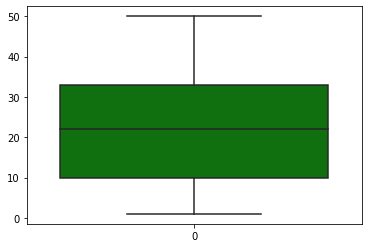

In [10]:
sns.boxplot(data=data['Ward'],color='green')

In [11]:
data['Arrest'].value_counts()

False    1354640
True      568875
Name: Arrest, dtype: int64

<AxesSubplot:>

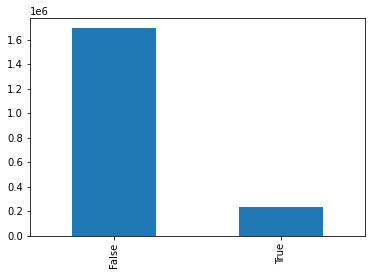

In [12]:
data['Domestic'].value_counts().plot(kind='bar')

In [13]:
data['Ward'].isnull().sum()

700132

<AxesSubplot:xlabel='Beat', ylabel='Count'>

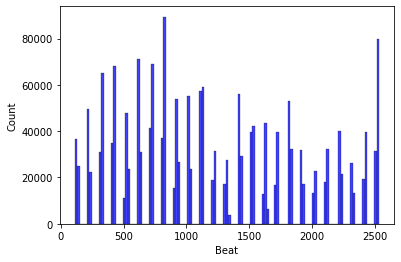

In [14]:
sns.histplot(data=data['Beat'],color='blue')

(array([176393., 148269.,  98193., 146312., 127532., 168189., 104451.,
         82079.,  97680.,  74285.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

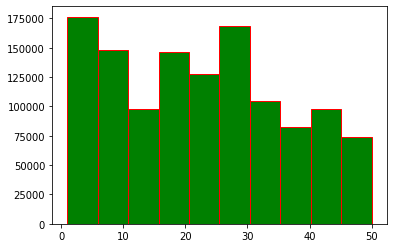

In [15]:
x=data['Ward']
plt.hist(x,edgecolor='red',color='green')

<AxesSubplot:>

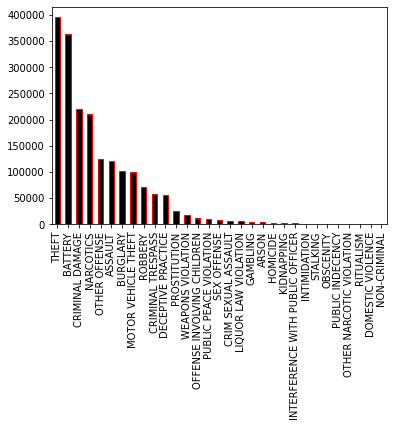

In [16]:
#OVERALL CRIME RATE CHECKING
data['Primary Type'].value_counts().plot(kind='bar',edgecolor='red',color='black')

In [17]:
data['Year'].value_counts() 

2001.000000    568517
2002.000000    490879
2003.000000    475913
2004.000000    388205
41.789832           1
Name: Year, dtype: int64

<AxesSubplot:>

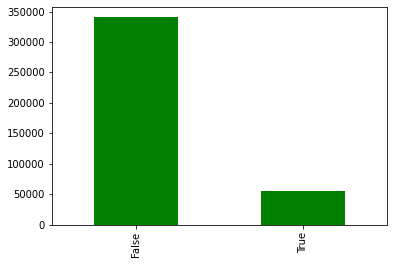

In [18]:
# LETS CHECK HOW MANY PEOPLE ARREST WHEN PRIME OR CRIME TYPE  IS THEFT
data['Arrest'][data['Primary Type']=='THEFT'].value_counts().plot(kind='bar',color='green') 


In [19]:
data["Date"] = pd.to_datetime(data["Date"])

In [20]:
X = data["Date"]
Y = data['Arrest']

In [21]:
import matplotlib.dates as mdates

**SPLITTING DATAFRAME WITH RESPECT TO YEAR TO GET BETTER INSIGHT**

In [22]:
data['Year']=data['Date'].dt.year

In [23]:
df_2001=data[data['Year']==2001]

In [24]:
df_2002=data[data['Year']==2002]

In [25]:
df_2003=data[data['Year']==2003]

In [26]:
df_2004=data[data['Year']==2004]

In [27]:
df_2001

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6,3756,4791194,HM403711,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,9.0,50.0,02,1182247.0,1829375.0,2001,08/29/2006 03:46:28 AM,41.687020002,-87.608445,"(41.687020002, -87.60844523)"
17,10808,4803028,HM414773,2001-01-01 00:00:00,055XX S TRIPP AVE,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,True,...,13.0,62.0,02,1149024.0,1867199.0,2001,10/03/2006 05:10:58 AM,41.791518681,-87.729099,"(41.791518681, -87.729098793)"
18,11210,4803606,HM417252,2001-01-01 00:00:00,032XX S OAKLEY AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,12.0,59.0,06,1161574.0,1882962.0,2001,06/25/2006 04:27:37 AM,41.834522994,-87.682642,"(41.834522994, -87.682642417)"
20,15214,4809221,HM423298,2001-06-16 08:00:00,063XX S DAMEN AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,...,15.0,67.0,02,1164076.0,1862580.0,2001,08/05/2006 04:48:25 AM,41.778539988,-87.674036,"(41.778539988, -87.674035599)"
25,16594,4811727,HM402010,2001-06-01 08:00:00,054XX W IOWA ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,...,37.0,25.0,17,1139668.0,1905504.0,2001,06/22/2006 03:55:52 AM,41.896808547,-87.762472,"(41.896808547, -87.762472408)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923493,6246515,4771567,HM384838,2001-01-01 00:01:00,048XX N PAULINA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,47.0,3.0,06,1164385.0,1932578.0,2001,06/07/2006 04:08:49 AM,41.970613961,-87.670922,"(41.970613961, -87.670922333)"
1923499,6248646,4774932,HM388575,2001-03-31 00:00:00,010XX E 73RD ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,5.0,69.0,06,1184535.0,1856867.0,2001,06/10/2006 03:42:52 AM,41.762408071,-87.599211,"(41.762408071, -87.599210982)"
1923504,6249542,4776541,HM386979,2001-08-15 12:00:00,029XX W 58TH ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,14.0,63.0,06,1157446.0,1865991.0,2001,06/13/2006 03:45:29 AM,41.788037177,-87.698249,"(41.788037177, -87.698249401)"
1923510,6252586,4781176,HM386461,2001-04-01 09:00:00,023XX N LATROBE AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,...,37.0,19.0,06,1140960.0,1915056.0,2001,06/14/2006 04:14:16 AM,41.922996623,-87.757492,"(41.922996623, -87.757491503)"


<AxesSubplot:>

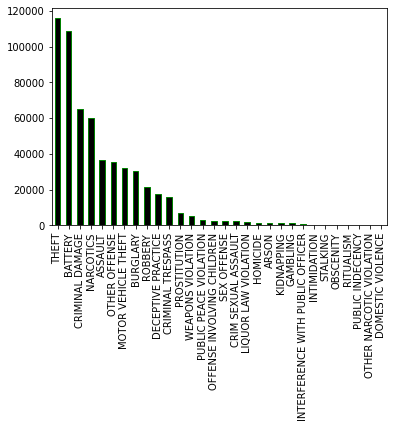

In [28]:
df_2001['Primary Type'].value_counts().plot(kind='bar',edgecolor='green',color='black')#CRIME RATE 2001

<AxesSubplot:>

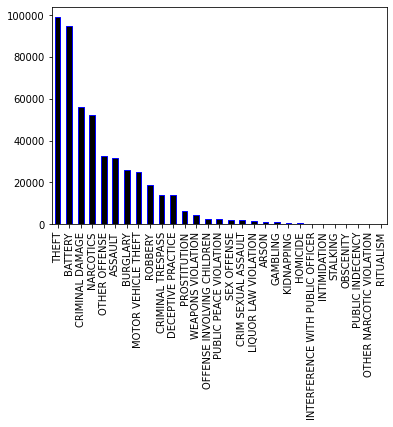

In [29]:
df_2002['Primary Type'].value_counts().plot(kind='bar',edgecolor='blue',color='black')# CRIME RATE 2002

<AxesSubplot:>

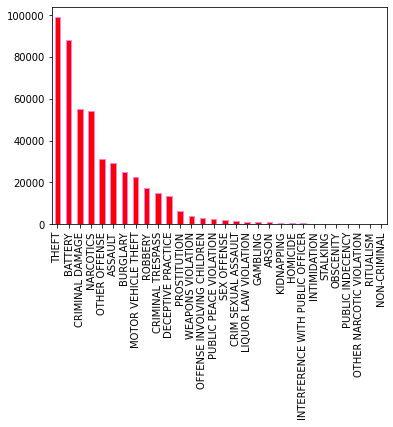

In [30]:
df_2003['Primary Type'].value_counts().plot(kind='bar',edgecolor='violet',color='Red') #CRIME RATE 2003

<AxesSubplot:>

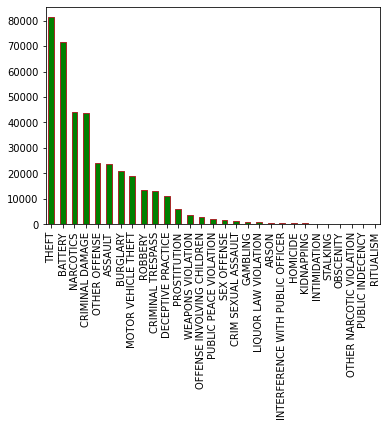

In [31]:
df_2004['Primary Type'].value_counts().plot(kind='bar',edgecolor='brown',color='green')# CRIME RATE 2004

In [32]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [33]:
data['Beat']

0           424
1           935
2          1413
3          2521
4          2233
           ... 
1923510    2515
1923511    1622
1923512     614
1923513     423
1923514     321
Name: Beat, Length: 1923515, dtype: int64

**GOING TO PREDICT CRIME TYPE(PRIMARY TYPE). DESCRIPTION,ARREST, DOMESTIC AND BEAT WOULD BE OUR INDEPENDENT VARIABLE WHICH WILL PREDICT**

In [34]:
# GOING TO CHECK WHAETHER IS THERE ANY OUTLIER IN DATA SET OR NOT
def outlier(data):
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    K=[]
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(K)
    print(K)



In [35]:
outliers=outlier(data['Beat'])

[]


C:\Users\Taimoor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Beat'>

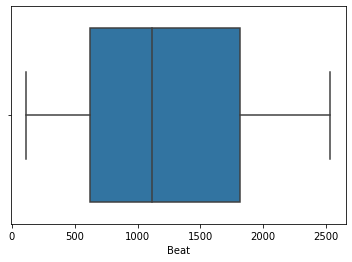

In [36]:
#LETS CHECK WITH GRAPH AS WELL
sns.boxplot(data['Beat']) 

In [37]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ['Description']
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

In [39]:
from sklearn.preprocessing import LabelEncoder
cols = ['Primary Type']
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

In [40]:
data[col].head(5)

0    29
1    21
2    19
3    29
4    29
Name: Primary Type, dtype: int32

In [41]:
data['Description'].unique()

array([141, 160,   4, 142, 259, 226, 154, 279,  18,  81, 228, 117, 153,
        68, 113,   5, 150, 285,  41,  19, 148, 295, 210, 224, 101, 321,
        59, 140, 130, 300,  42,  40, 260, 137, 193, 246, 158, 200, 290,
       249, 164, 247, 116, 195, 152, 288, 253, 248,   1, 159,  28, 272,
       126, 168, 114, 111, 284, 102, 214, 172, 315, 311, 307, 118, 312,
        99, 220,  64,  22,  84,  73, 296, 306, 174, 261, 115,  57,  82,
       298, 146, 221, 120,  52, 281, 263, 283,  43, 144,  61, 143, 213,
       316, 318,  88,  69,  67,  45,   7, 293,  51,  39, 192,  72, 149,
        48, 336, 299,  20, 100,  75,  77, 187,  36, 333, 233, 310, 176,
        54, 292,  93, 165,  58, 265, 328, 330, 112, 309, 280, 242, 132,
        76, 278,  70,  56, 177, 324,  80, 232, 185, 334, 320, 275, 199,
       286, 257,  44, 138, 212, 198,  34,  60, 182,  55, 264, 308, 256,
       304,  92, 236, 139, 196, 271, 169, 332,  30,  78, 302, 329, 325,
        53,  89, 319, 217, 234, 317, 240, 251,  16, 161, 255, 12

In [42]:
data['Crime Type']=data['Primary Type']

In [43]:
df=data[['Description','Beat','Arrest','Domestic','Crime Type']]

In [44]:
df

,Description,Beat,Arrest,Domestic,Crime Type
0,141,424,False,False,29
1,160,935,False,True,21
2,4,1413,False,False,19
3,141,2521,False,False,29
4,142,2233,False,False,29
...,...,...,...,...,...
1923510,142,2515,False,False,29
1923511,141,1622,False,False,29
1923512,141,614,False,False,29
1923513,148,423,False,False,3


In [45]:
import scipy.stats as stats

In [46]:
X = df.drop(columns=['Crime Type'], axis=1)
y = df['Crime Type']


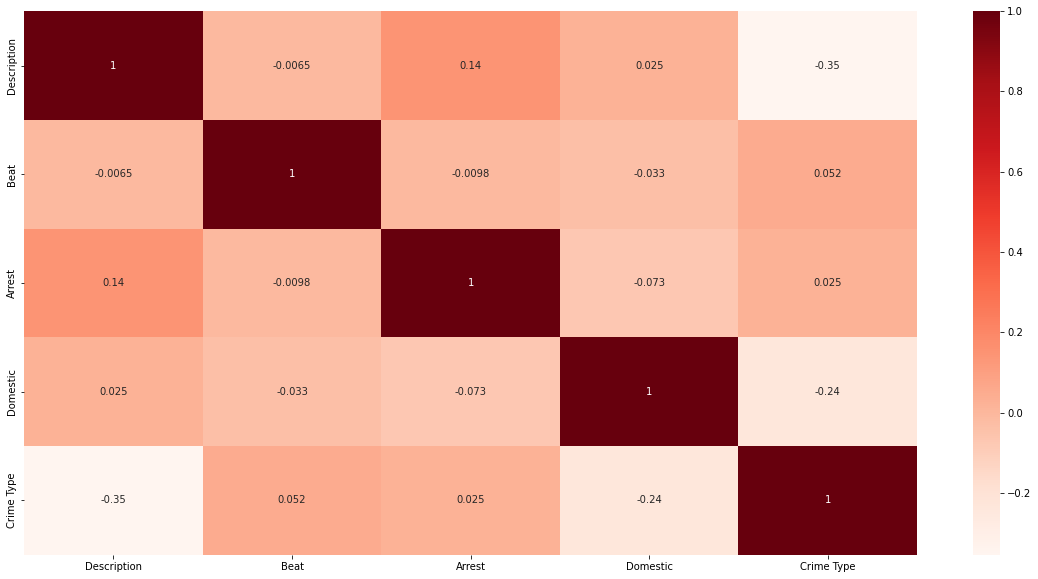

In [47]:

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [48]:
df.corr()

,Description,Beat,Arrest,Domestic,Crime Type
Description,1.000000,-0.006520,0.144942,0.024966,-0.354287
Beat,-0.006520,1.000000,-0.009787,-0.033114,0.051726
Arrest,0.144942,-0.009787,1.000000,-0.073299,0.025282
Domestic,0.024966,-0.033114,-0.073299,1.000000,-0.235083
Crime Type,-0.354287,0.051726,0.025282,-0.235083,1.000000


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 93.57697050609404


C:\Users\Taimoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross validation is 93.53293319781754


In [57]:
y_pred=model.predict(X)

In [58]:
y_pred

array([29, 21, 19, ..., 29,  3, 29])

In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
model=KNeighborsClassifier(n_neighbors=3)
classify(model, X, y)

Accuracy is 91.69146500471012


C:\Users\Taimoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross validation is 91.68028323147986


In [61]:
y_pred=model.predict(x_test)

In [62]:
y_pred

array([29, 21,  3, ...,  1, 29, 26])

In [64]:
print("Classification Report is:\n",classification_report(y_test,y_pred))

C:\Users\Taimoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taimoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       938
           1       0.39      0.26      0.31     30447
           2       0.77      0.86      0.82     90824
           3       0.99      1.00      0.99     25571
           4       0.95      0.72      0.82      1797
           5       0.99      1.00      0.99     55230
           6       0.99      0.95      0.97     14424
           7       0.98      0.97      0.98     14103
           9       0.98      0.92      0.95      1009
          10       0.97      0.99      0.98       755
          11       0.85      0.62      0.72       429
          12       0.84      0.90      0.87       333
          13       0.90      0.66      0.76       775
          14       0.93      0.97      0.95      1309
          15       0.99      1.00      1.00     24671
          16       1.00      1.00      1.00     52572
          18       0.50      0.05      0.09        20


C:\Users\Taimoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[  758     0     0    15     0     0     0     0     0     0     1     0
      3     0     0     4     0     0     0     0     2     0     0     0
    145     0     0     8     2]
 [    0  7977 22444     0     4     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
     20     2     0     0     0]
 [    3 12301 78456     0     1     0     0     0     1     0     2     0
      0     0     0     2     0     0     0     0     0     0     0     0
     20     2     0    36     0]
 [    0     0     0 25536     0     0     0     0     0     0     0     0
      0    35     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   14   157   211    72  1291     0     0     0     0     0     0     0
      0     0    22    29     0     0     0     0     0     0     0     0
      0     0     0     1     0]
 [    0     0     0     0     0 55025   172     4     0     0    10     2
  

In [68]:
print("Training Score:\n",model.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Training Score:
 92.20683526544464
Mean Squared Error:
 1.8555748951399416
R2 score is:
 0.9841753250860553
